# Intersecting SNPs and GO enrichment

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.palettes import TolRainbow
import random
from scipy.stats import fisher_exact

In [2]:
os.chdir('/media/HDD_4TB_1/jordi/cfuses_gnn_enrollhd_2024/')

# Results directory
results_dir = "data/ml_results/regressors_info/"

# Data directory
data_dir = "data/features/"

In [3]:
# Load data of each model
lasso = pd.read_csv(results_dir+"lasso_regressor_bsc_coefs.txt", sep='\t')
elasticnet = pd.read_csv(results_dir+"elastic_net_regressor_bsc_coefs.txt", sep='\t')
histXGBoost = pd.read_csv(results_dir+"histXGBoost_regressor_bsc_coefs.txt", sep='\t')
approxXGBoost = pd.read_csv(results_dir+"approxXGBoost_regressor_bsc_coefs.txt", sep='\t')
randomforest = pd.read_csv(results_dir+"randomforest_regressor_bsc_coefs.txt", sep='\t')

In [4]:
models = [lasso, elasticnet, histXGBoost, approxXGBoost, randomforest]
model_names = ['Lasso', 'Elastic Net', 'Hist XGBoost', 'Approx XGBoost', 'Random Forest']

## Intersecting SNPS

In [158]:
# Find the intersection of the SNP columns
intersecting_snps = set(lasso['SNP'])

for model in models[1:]:
    intersecting_snps.intersection_update(model['SNP'])
    
SNPintersection = lasso[lasso['SNP'].isin(intersecting_snps)]

In [159]:
SNPintersection

,SNP,Coefficient,Gene,GO


In [163]:
# Find the intersection of the Gene columns
intersecting_genes = set(lasso['Gene'])

for model in models[1:]:
    intersecting_genes.intersection_update(model['Gene'])

In [164]:
intersecting_genes

{'CDYL2', 'FAN1', 'MYT1L'}

Linear models

In [35]:
# Find the intersection of the SNP columns
intersecting_snps = set(lasso['SNP']).intersection(set(elasticnet['SNP']))

# Filter df to get information about intersecting SNPs
linearmodels_SNPintersection = lasso[lasso['SNP'].isin(intersecting_snps)]

print(len(linearmodels_SNPintersection), 'SNPs intersecting betweent the two linear models.')

linearmodels_SNPintersection.head(20)


839 SNPs intersecting betweent the two linear models.


,SNP,Coefficient,Gene,GO
0,rs17173770,0.036561,SMARCD3,GO:0140110
1,rs61997076,0.033997,FAN1,extra_genes
2,rs144287831,0.029233,MLH1,GO:0006298
3,rs10885398,-0.028515,TCF7L2,GO:0140110
4,rs8017707,-0.026801,ESRRB,GO:0140110
5,rs1543108,-0.025090,CTSO,GO:0004197
6,rs2278687,0.023999,ESRRB,GO:0140110
7,rs1650649,-0.022265,MSH3,GO:0006298
8,rs5743063,-0.021884,PMS1,GO:0006298
9,rs7500197,0.021786,GRID2,GO:0035249


In [166]:
randomforest.head(20)

,SNP,Gini_Importance,Gene,GO
0,rs77752857,0.001421,NEK6,GO:0031625
1,rs1043742,0.000995,CUL2,GO:0043161
2,rs11201880,0.000837,GRID1,GO:0035249
3,rs10169129,0.000586,MYT1L,GO:0140110
4,rs342,0.000578,ABCB1,GO:0031625
5,rs10516927,0.000570,GRID2,GO:0035249
6,rs143394620,0.000509,EGFR,GO:0031625
7,rs118089305,0.000504,FAN1,extra_genes
8,rs17767868,0.000499,ZFAT,GO:0140110
9,rs17760586,0.000495,ZFAT,GO:0140110


Tree based models

In [37]:
# Convert RF's top 30 SNPs to a set
intersecting_SNPs = set(randomforest.iloc[:30,0])

# Intersect with XGBoosts (all their SNPs)
intersecting_SNPs.intersection_update(histXGBoost['SNP'])
intersecting_SNPs.intersection_update(approxXGBoost['SNP'])

# Filter df to get information about intersecting SNPs
treemodels_SNPintersection = histXGBoost[histXGBoost['SNP'].isin(intersecting_SNPs)]

print(len(treemodels_SNPintersection), 'SNPs intersecting betweent the three tree based models.')

treemodels_SNPintersection

2 SNPs intersecting betweent the three tree based models.


,SNP,Gain,Gene,GO
0,rs10169129,21.090668,MYT1L,GO:0140110
20,rs118089305,9.558371,FAN1,extra_genes


Between XGBoosts

In [39]:
# Convert hist XGBoost SNPs to a set
intersecting_SNPs = set(histXGBoost['SNP'])

# Intersect with approx
intersecting_SNPs.intersection_update(approxXGBoost['SNP'])

# Filter df to get information about intersecting SNPs
xgboostmodels_SNPintersection = histXGBoost[histXGBoost['SNP'].isin(intersecting_SNPs)]

print(len(xgboostmodels_SNPintersection), 'SNPs intersecting betweent the two XGBoost models.')

xgboostmodels_SNPintersection

7 SNPs intersecting betweent the two XGBoost models.


,SNP,Gain,Gene,GO
0,rs10169129,21.090668,MYT1L,GO:0140110
1,rs61997076,17.790247,FAN1,extra_genes
2,rs141338757,15.449226,HTT,extra_genes
11,rs57013064,10.138041,CDYL2,GO:0140110
12,rs72841819,10.081390,BTRC,GO:0043161
20,rs118089305,9.558371,FAN1,extra_genes
31,rs5743061,6.857512,PMS1,GO:0006298


The SNPs of the best performing model

In [40]:
histXGBoost

,SNP,Gain,Gene,GO
0,rs10169129,21.090668,MYT1L,GO:0140110
1,rs61997076,17.790247,FAN1,extra_genes
2,rs141338757,15.449226,HTT,extra_genes
3,rs2393777,14.811421,HNF1A,GO:0140110
4,rs245105,14.218707,DHFR,GO:0046655
5,rs2316153,11.806948,CDYL2,GO:0140110
6,rs144287831,11.364587,MLH1,GO:0006298
7,rs79727797,11.205156,TCERG1,GO:0140110
8,rs139931071,10.507679,STAM,GO:0051402
9,rs2293317,10.322250,FAN1,extra_genes


## GO barplot

In [5]:
# Get percentages of GO categories in feature matrix (background GO percentages)

# Extract feature matrix header
with open(data_dir + "subsetting/header_feature_matrix_m3_filt_0.01.txt", "r") as file:
    header = file.readline().strip().split("\t")
        
# Get the names of the features which are SNPs
snps_feature_names = header[3:]

# Read SNP lookup table (created before filtering for alternative prevalence)
snp_lookuptab = pd.read_csv("data/SNPs/snps_gene_GO_m3.txt", sep="\t")

In [6]:
# Convert snps_feature_names to a df
snps_df = pd.DataFrame(snps_feature_names, columns=['SNP'])

# Drop duplicates from snp_lookuptab based on the SNP column
snp_lookuptab_unique = snp_lookuptab.drop_duplicates(subset=['SNP'])

# Merge snps_df with the deduplicated snp_lookuptab on the SNP column
model_snps = snps_df.merge(snp_lookuptab_unique, on='SNP', how='left')

# Rename GO column
model_snps = model_snps.rename(columns={'GO_term': 'GO'})

In [8]:
background = model_snps['GO'].value_counts(normalize=True) * 100

In [8]:
distributions = []

# Append background GO percentages
distributions.append(background)

# Calculate the percentage distribution of GO categories for each model
for model in models:
    go_counts = model['GO'].value_counts(normalize=True) * 100
    distributions.append(go_counts)

In [9]:
model_names_bg = ['Background'] + model_names

In [10]:
# Combine distributions into a single DataFrame
combined_df = pd.DataFrame(distributions).T.fillna(0)
combined_df.columns = model_names

In [24]:
# Set global font sizes
plt.rcParams.update({
    'axes.titlesize': 17,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.titlesize': 20
})

In [25]:
# Select 15 distinct colors from Bokeh's TolRainbow palette
colors = list(TolRainbow[15])

In [27]:
# Assign readable GO term names
GO_names = {'GO:0006298': 'Mismatch repair',
            'GO:0035249': 'Glutamatergic synaptic transmission',
            'GO:0008242': 'Omagea peptidase activity',
            'GO:0004197': 'Cysteine-type endopeptidase activity',
            'GO:0043161': 'Ubiquitin-dependant protein catabolic process',
            'GO:0043130': 'Ubiquitin binding',
            'GO:0031625': 'Ubiquitin protein ligase binding',
            'GO:0016579': 'Protein deubiquitination',
            'GO:0140110': 'Transciption regulator activity',
            'GO:0051402': 'Neuron apoptotic process',
            'GO:0042157': 'Lipoprotein metabolic process',
            'GO:0098930': 'Axonal transport',
            'GO:0046655': 'Folic acid metabolism',
            'GO:0006112': 'Energy reserve metabolism',
            'extra_genes': 'Extra genes'}

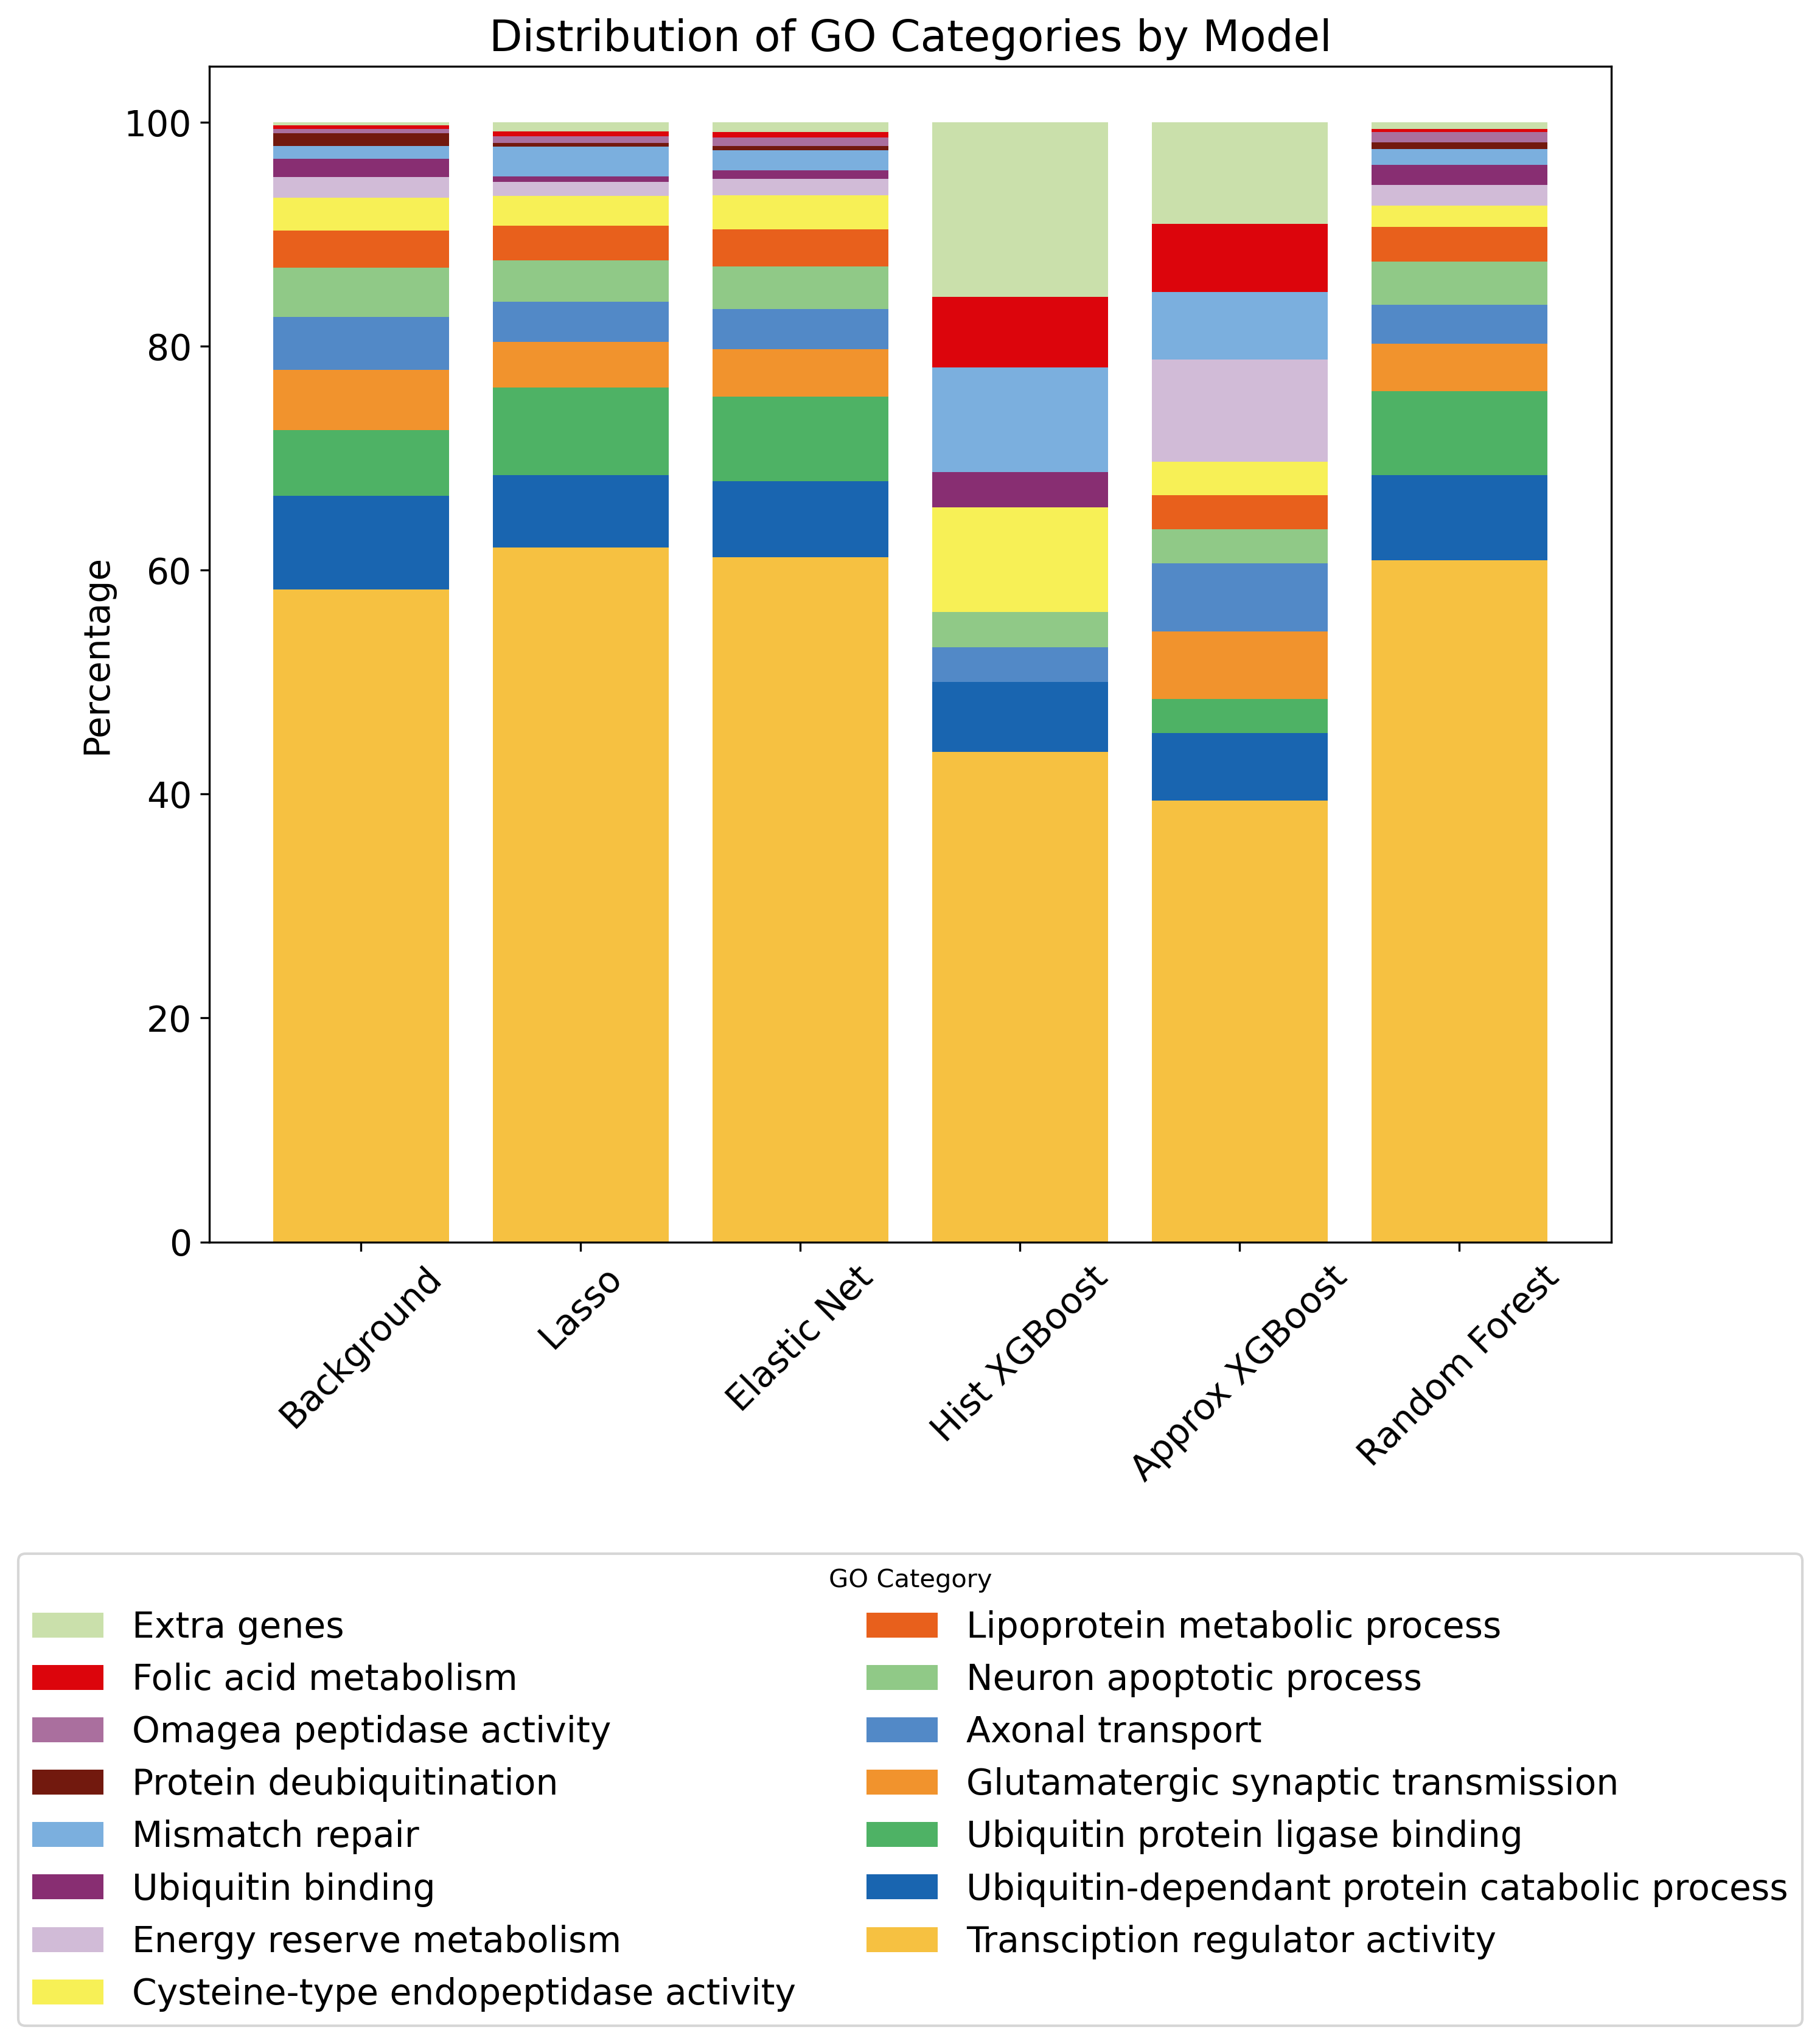

In [94]:
# Combine distributions into a single DataFrame
combined_df = pd.DataFrame(distributions).T.fillna(0)
combined_df.columns = model_names_bg

# Shuffle the colors
random.shuffle(colors)

fig, ax = plt.subplots(figsize=(10, 12), dpi=300)

# Plot stacked bar chart
bottom = None
bars = []
labels = []
for i, go_category in enumerate(combined_df.index):
    if bottom is None:
        bar = ax.bar(model_names_bg, combined_df.loc[go_category], label=GO_names[go_category], color=colors[i])
        bottom = combined_df.loc[go_category]
    else:
        bar = ax.bar(model_names_bg, combined_df.loc[go_category], bottom=bottom, label=GO_names[go_category], color=colors[i])
        bottom += combined_df.loc[go_category]
    bars.append(bar)
    labels.append(GO_names[go_category])

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_title('Distribution of GO Categories by Model')

# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45)

# Create a custom legend with the same order as combined_df.index, but reversed
handles = [bar[0] for bar in reversed(bars)]
labels = list(reversed(labels))

# Position the legend below the plot with two columns
ax.legend(handles, labels, title='GO Category', bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2)

plt.tight_layout()
plt.show()

## Fisher test for enrichment analysis

In [10]:
# Extract backgroudn GO counts
background = model_snps['GO'].value_counts()

In [12]:
distributions = []

# Append background GO counts
distributions.append(background)

# Calculate number of cases of GO categories for each model
for model in models:
    go_counts = model['GO'].value_counts()
    distributions.append(go_counts)

In [45]:
# Combine distributions into a single DataFrame
combined_df = pd.DataFrame(distributions).T.fillna(0).astype(int)
combined_df.columns = model_names_bg
# combined_df.to_csv(results_dir+ 'models_GOcounts.csv')

# Column Total
combined_df_modeltotal = combined_df.sum()

In [33]:
# Perform Fisher's exact test for each GO term against the background
pval_results = {}
odds_results = {}

for go_term in combined_df.index:
    go_proportions = combined_df.loc[go_term].drop('Background')  # Exclude 'Background' column
    background_count = combined_df.loc[go_term, 'Background']
    p_values = {}
    odds = {}
    for model, proportion in go_proportions.items():
        # Contingency table assmeble
        contingency_tab = [[proportion, combined_df_modeltotal[model] - proportion], [background_count, combined_df_modeltotal['Background'] - background_count]]
        
        # Fisher test
        oddsratio, p_value = fisher_exact(contingency_tab)
        
        # Save results in corresponding vectors
        p_values[model] = p_value
        odds[model] = oddsratio
        
    # Add result vector to dictionary
    pval_results[go_term] = p_values
    odds_results[go_term] = odds

# Convert results to DataFrame
pval_results_df = pd.DataFrame(pval_results)
odds_results_df = pd.DataFrame(odds_results)

In [52]:
odds_results_df = odds_results_df.round(4).T
# odds_results_df.to_csv(results_dir+ 'odds_enrichment.csv')

In [40]:
result = pval_results_df.round(4).T
# result.to_csv(results_dir+ 'pvals_enrichment.csv')

In [36]:
pval_results_df<0.05

,GO:0140110,GO:0043161,GO:0031625,GO:0035249,GO:0098930,GO:0051402,GO:0042157,GO:0004197,GO:0006112,GO:0043130,GO:0006298,GO:0016579,GO:0008242,GO:0046655,extra_genes
Lasso,True,True,True,False,False,False,False,False,False,True,True,True,False,False,True
Elastic Net,True,False,True,False,False,False,False,False,False,True,False,True,True,False,True
Hist XGBoost,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
Approx XGBoost,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
Random Forest,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True
